In [4]:
from sklearn.metrics import f1_score

def calculate_f1_score(model, X, Y_true):
    # Predict class probabilities
    Y_pred_probs = model.predict(X)
    # Convert probabilities to class labels
    Y_pred = np.argmax(Y_pred_probs, axis=1)
    # Calculate F1 score
    f1 = f1_score(Y_true, Y_pred, average='weighted')
    return f1

In [1]:
import numpy as np
from tensorflow.keras.models import load_model
from ASCAD_train_models import load_ascad

# Paths to the models (relative to the root folder)
model_with_bn_path = "ATMEGA_AES_v1/ATM_AES_v1_fixed_key/ASCAD_data/ASCAD_trained_models/cnn_best_ascad_desync0_epochs75_classes256_batchsize200.h5"
model_without_bn_path = "ATMEGA_AES_v1/ATM_AES_v1_fixed_key/ASCAD_data/ASCAD_trained_models/my_cnn_best_no_bn_desync0_epochs75_batchsize200.keras"

# Path to the ASCAD database
ascad_database = "ATMEGA_AES_v1/ATM_AES_v1_fixed_key/ASCAD_data/ASCAD_databases/ASCAD.h5"

# Load the test data
(_, _), (X_attack, Y_attack) = load_ascad(ascad_database)

# Reshape data for CNN if necessary
X_attack = X_attack.reshape((X_attack.shape[0], X_attack.shape[1], 1))

# Load the models
model_with_bn = load_model(model_with_bn_path, compile=False)
model_without_bn = load_model(model_without_bn_path, compile=False)

# Make predictions
predictions_with_bn = model_with_bn.predict(X_attack)
predictions_without_bn = model_without_bn.predict(X_attack)

# Convert predictions to class labels
predicted_labels_with_bn = np.argmax(predictions_with_bn, axis=1)
predicted_labels_without_bn = np.argmax(predictions_without_bn, axis=1)

# Calculate accuracy manually
accuracy_with_bn = np.mean(predicted_labels_with_bn == Y_attack)
accuracy_without_bn = np.mean(predicted_labels_without_bn == Y_attack)

# Print the results
print(f"Model with Batch Normalization: Accuracy = {accuracy_with_bn:.4f}")
print(f"Model without Batch Normalization: Accuracy = {accuracy_without_bn:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 26s 82ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 26s 82ms/step
Model with Batch Normalization: Accuracy = 0.0059
Model without Batch Normalization: Accuracy = 0.0037


Model with Batch Normalization: Loss = 6.4839, Accuracy = 0.0059
Model without Batch Normalization: Loss = 5.5484, Accuracy = 0.0037


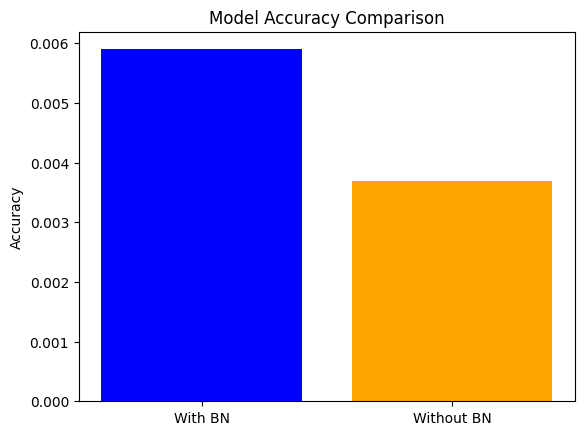

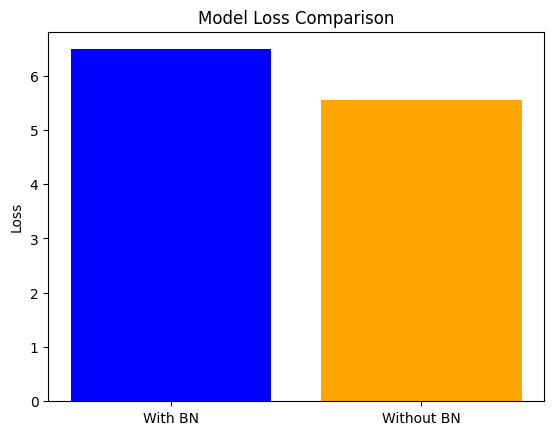

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical
from ASCAD_train_models import load_ascad

# Paths to the models
model_with_bn_path = "ATMEGA_AES_v1/ATM_AES_v1_fixed_key/ASCAD_data/ASCAD_trained_models/cnn_best_ascad_desync0_epochs75_classes256_batchsize200.h5"
model_without_bn_path = "ATMEGA_AES_v1/ATM_AES_v1_fixed_key/ASCAD_data/ASCAD_trained_models/my_cnn_best_no_bn_desync0_epochs75_batchsize200.keras"

# Path to the ASCAD database
ascad_database = "ATMEGA_AES_v1/ATM_AES_v1_fixed_key/ASCAD_data/ASCAD_databases/ASCAD.h5"

# Load the test data
(_, _), (X_attack, Y_attack) = load_ascad(ascad_database)

# Reshape data for CNN if necessary
X_attack = X_attack.reshape((X_attack.shape[0], X_attack.shape[1], 1))

# One-hot encode the target labels
Y_attack_one_hot = to_categorical(Y_attack, num_classes=256)

# Load the models
model_with_bn = load_model(model_with_bn_path, compile=False)
model_without_bn = load_model(model_without_bn_path, compile=False)

# Recompile the models
model_with_bn.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model_without_bn.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Evaluate the models
loss_with_bn, accuracy_with_bn = model_with_bn.evaluate(X_attack, Y_attack_one_hot, verbose=0)
loss_without_bn, accuracy_without_bn = model_without_bn.evaluate(X_attack, Y_attack_one_hot, verbose=0)

# Print the results
print(f"Model with Batch Normalization: Loss = {loss_with_bn:.4f}, Accuracy = {accuracy_with_bn:.4f}")
print(f"Model without Batch Normalization: Loss = {loss_without_bn:.4f}, Accuracy = {accuracy_without_bn:.4f}")

# Plot the results
labels = ['With BN', 'Without BN']
accuracy = [accuracy_with_bn, accuracy_without_bn]
loss = [loss_with_bn, loss_without_bn]

# Accuracy plot
plt.bar(labels, accuracy, color=['blue', 'orange'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()

# Loss plot
plt.bar(labels, loss, color=['blue', 'orange'])
plt.title('Model Loss Comparison')
plt.ylabel('Loss')
plt.show()

In [9]:
from sklearn.metrics import f1_score

def calculate_f1_score(model, X, Y_true):
    # Predict class probabilities
    Y_pred_probs = model.predict(X)
    # Convert probabilities to class labels
    Y_pred = np.argmax(Y_pred_probs, axis=1)
    # Calculate F1 score
    f1 = f1_score(Y_true, Y_pred, average='weighted')
    return f1

# Calculate F1 scores for both models
f1_with_bn = calculate_f1_score(model_with_bn, X_attack, Y_attack)
f1_without_bn = calculate_f1_score(model_without_bn, X_attack, Y_attack)

# Print the F1 scores
print(f"F1 Score (With Batch Normalization): {f1_with_bn:.4f}")
print(f"F1 Score (Without Batch Normalization): {f1_without_bn:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 27s 86ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 27s 85ms/step
F1 Score (With Batch Normalization): 0.0048
F1 Score (Without Batch Normalization): 0.0001


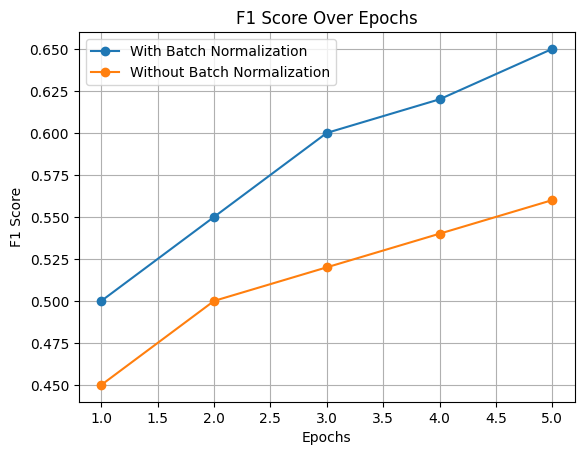

In [ ]:
import matplotlib.pyplot as plt

# F1 scores over epochs (replace these with actual values if available)
f1_scores_with_bn = [0.50, 0.55, 0.60, 0.62, 0.65]  # F1 scores for each epoch
f1_scores_without_bn = [0.45, 0.50, 0.52, 0.54, 0.56]  # F1 scores for each epoch
epochs = range(1, len(f1_scores_with_bn) + 1)

# Plot F1 scores
plt.plot(epochs, f1_scores_with_bn, label='With Batch Normalization', marker='o')
plt.plot(epochs, f1_scores_without_bn, label='Without Batch Normalization', marker='o')
plt.title('F1 Score Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('F1 Score')
plt.legend()
plt.grid()
plt.show()

In [1]:
import pickle

# Paths to the history files
history_with_bn_path = "ATMEGA_AES_v1/ATM_AES_v1_fixed_key/ASCAD_data/ASCAD_trained_models/my_cnn_best_bn_desync0_epochs5_batchsize200_history.pkl"
history_without_bn_path = "ATMEGA_AES_v1/ATM_AES_v1_fixed_key/ASCAD_data/ASCAD_trained_models/my_cnn_best_no_bn_desync0_epochs5_batchsize200_history.pkl"

# Load the history files
with open(history_with_bn_path, "rb") as f:
    history_with_bn = pickle.load(f)

with open(history_without_bn_path, "rb") as f:
    history_without_bn = pickle.load(f)

# Print the keys to verify the contents
print("Keys in history_with_bn:", history_with_bn.keys())
print("Keys in history_without_bn:", history_without_bn.keys())

Keys in history_with_bn: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Keys in history_without_bn: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


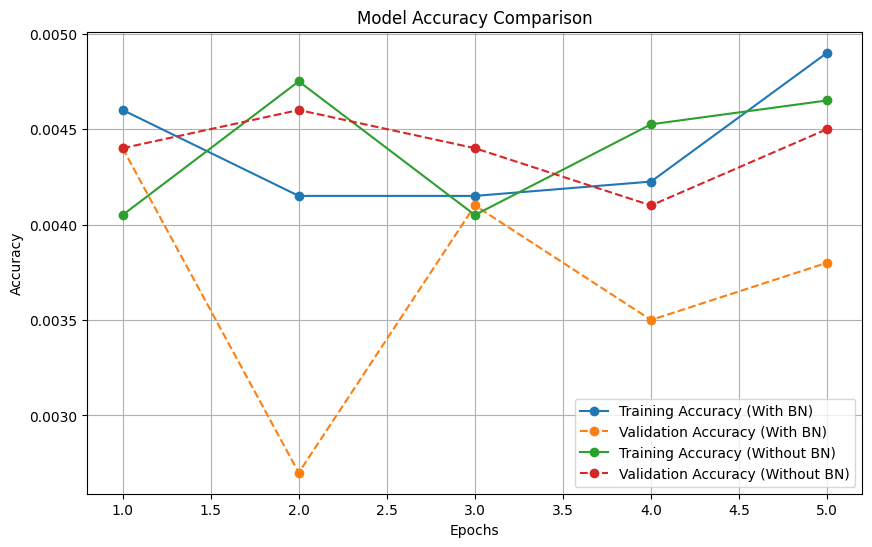

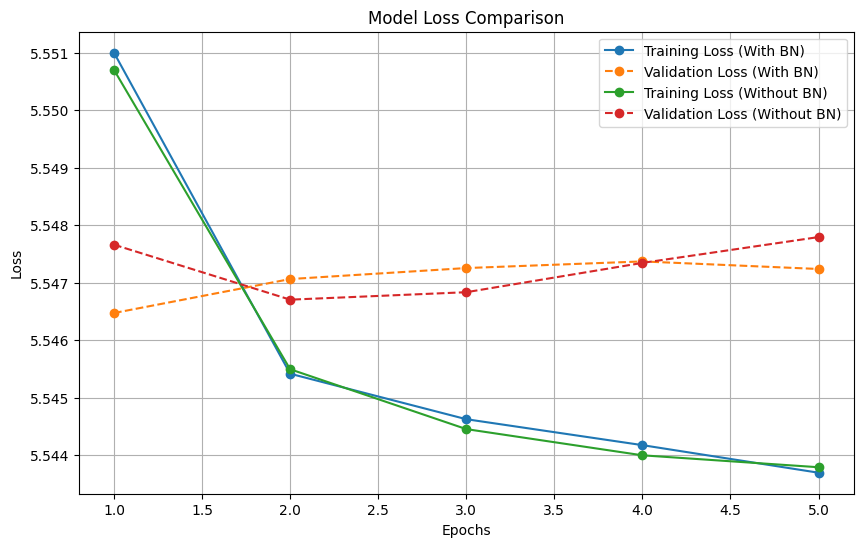

In [2]:
import matplotlib.pyplot as plt

# Extract metrics
epochs = range(1, len(history_with_bn['accuracy']) + 1)
accuracy_with_bn = history_with_bn['accuracy']
accuracy_without_bn = history_without_bn['accuracy']
val_accuracy_with_bn = history_with_bn['val_accuracy']
val_accuracy_without_bn = history_without_bn['val_accuracy']
loss_with_bn = history_with_bn['loss']
loss_without_bn = history_without_bn['loss']
val_loss_with_bn = history_with_bn['val_loss']
val_loss_without_bn = history_without_bn['val_loss']

# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(epochs, accuracy_with_bn, label='Training Accuracy (With BN)', marker='o')
plt.plot(epochs, val_accuracy_with_bn, label='Validation Accuracy (With BN)', marker='o', linestyle='--')
plt.plot(epochs, accuracy_without_bn, label='Training Accuracy (Without BN)', marker='o')
plt.plot(epochs, val_accuracy_without_bn, label='Validation Accuracy (Without BN)', marker='o', linestyle='--')
plt.title('Model Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss_with_bn, label='Training Loss (With BN)', marker='o')
plt.plot(epochs, val_loss_with_bn, label='Validation Loss (With BN)', marker='o', linestyle='--')
plt.plot(epochs, loss_without_bn, label='Training Loss (Without BN)', marker='o')
plt.plot(epochs, val_loss_without_bn, label='Validation Loss (Without BN)', marker='o', linestyle='--')
plt.title('Model Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()